In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('../data/dataframe_with_extension.csv')
df.columns

Index(['Unnamed: 0', 'Data Input Year', 'State', 'Country', 'Language',
       'IPEDS Race Description', 'Athletic Code', 'Team Gender', 'Team Name',
       'HYR', 'Entering Term', 'Yr', 'FCLASS', 'RetentionClass', 'ACADINDEX',
       'SATCFORAI', 'ACTUSE', 'SATCUSE', 'SATVUSE', 'satm', 'satwr', 'HSGPA',
       'FIRSTCOLLEGE', 'FIRSTMAJOR', 'First Major Name', 'LASTCOLLEGE',
       'LASTMAJOR', 'Last Major Name', 'Last Cumulative BU GPA',
       'Cumulative GPA-1st Sem', 'Cumulative GPA-2nd Sem',
       'Cumulative GPA-3rd Sem', 'Cumulative GPA-4th Sem',
       'Cumulative GPA-5th Sem', 'Cumulative GPA-6th Sem',
       'Cumulative GPA-7th Sem', 'Cumulative GPA-8th Sem',
       'Cumulative GPA-9th Sem', 'Cumulative GPA-10th Sem',
       'Cumulative GPA-11th Sem', 'Cumulative GPA-12th Sem',
       'Cumulative GPA-13th Sem', 'Cumulative GPA-14th Sem',
       'Cumulative GPA-15th Sem', 'Cumulative GPA-16th Sem',
       'Cumulative GPA-17th Sem', 'Cumulative GPA-18th Sem',
       'Cumulativ

In [21]:
X = df.drop(columns=['Unnamed: 0', 'Data Input Year', 'State', 'IPEDS Race Description', 'Team Name',
       'HYR', 'Entering Term', 'Yr', 'FCLASS', 'RetentionClass', 'ACTUSE', 'SATCUSE', 'SATVUSE', 'satm', 'satwr', 
       'FIRSTCOLLEGE', 'First Major Name', 'LASTCOLLEGE', 'Last Major Name', 'Cumulative GPA-1st Sem', 'Cumulative GPA-2nd Sem',
       'Cumulative GPA-3rd Sem', 'Cumulative GPA-4th Sem',
       'Cumulative GPA-5th Sem', 'Cumulative GPA-6th Sem',
       'Cumulative GPA-7th Sem', 'Cumulative GPA-8th Sem',
       'Cumulative GPA-9th Sem', 'Cumulative GPA-10th Sem',
       'Cumulative GPA-11th Sem', 'Cumulative GPA-12th Sem',
       'Cumulative GPA-13th Sem', 'Cumulative GPA-14th Sem',
       'Cumulative GPA-15th Sem', 'Cumulative GPA-16th Sem',
       'Cumulative GPA-17th Sem', 'Cumulative GPA-18th Sem',
       'Cumulative GPA-19th Sem', 'Cumulative GPA-20th Sem',
       'Cumulative GPA-21st Sem', 'Cumulative GPA-22nd Sem',
       'Semester GPI-1st Sem', 'Semester GPI-2nd Sem', 'Semester GPI-3rd Sem',
       'Semester GPI-4th Sem', 'Semester GPI-5th Sem', 'Semester GPI-6th Sem',
       'Semester GPI-7th Sem', 'Semester GPI-8th Sem', 'Semester GPI-9th Sem',
       'Semester GPI-10th Sem', 'Semester GPI-11th Sem', 'Last Cumulative and First GPA diff', 'Standardized Test'
       ])
X.columns

Index(['Country', 'Language', 'Athletic Code', 'Team Gender', 'ACADINDEX',
       'SATCFORAI', 'HSGPA', 'FIRSTMAJOR', 'LASTMAJOR',
       'Last Cumulative BU GPA', 'SwitchedMajor', 'transfer',
       'Q1_COACH_LEADERSHIP', 'Q2_COACH_COMMUNICATION',
       'Q3_ASST_COACH_COMMUNICATION', 'Q4_STUDENT_ATHLETE_LEADERSHIP',
       'Q5_TRAINERS_CARE', 'Q6_TRAINERS_COMMUNICATION',
       'Q7_CONDITIONING_STAFF_COMMUNICATION', 'Q8_CONDITIONING_STAFF_JOB',
       'Q9_ACADEMIC_SUPPORT_SERVICES', 'Q10_DEVELOPMENT_SERVICES',
       'Q11_APPAREL_EQUIPMENT', 'Q12_SAFETY', 'Q13_ADMINISTRATIVE_SUPPORT',
       'Q14_DIVERSITY_ACCEPTANCE', 'Q15_EXPECTATION_EQUALITY_BY_GENDER',
       'Q16_TIME_DEMAND_AND_LIFE_BALANCE', 'Q17_COACH_EMPHASIS_ON_ACADEMICS'],
      dtype='object')

In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(X["Country"])
X["Country"] = label_encoder.transform(X["Country"])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(X["Language"])
X["Language"] = label_encoder.transform(X["Language"])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(X["Team Gender"])
X["Team Gender"] = label_encoder.transform(X["Team Gender"])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(X["Athletic Code"])
X["Athletic Code"] = label_encoder.transform(X["Athletic Code"])
X.head()


,Country,Language,Athletic Code,Team Gender,ACADINDEX,SATCFORAI,HSGPA,FIRSTMAJOR,LASTMAJOR,Last Cumulative BU GPA,...,Q8_CONDITIONING_STAFF_JOB,Q9_ACADEMIC_SUPPORT_SERVICES,Q10_DEVELOPMENT_SERVICES,Q11_APPAREL_EQUIPMENT,Q12_SAFETY,Q13_ADMINISTRATIVE_SUPPORT,Q14_DIVERSITY_ACCEPTANCE,Q15_EXPECTATION_EQUALITY_BY_GENDER,Q16_TIME_DEMAND_AND_LIFE_BALANCE,Q17_COACH_EMPHASIS_ON_ACADEMICS
0,6,0,3,0,198.0,1220.0,3.4,2204.0,2204.0,3.00,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71
1,45,0,11,0,204.7,1230.0,3.6,602.0,601.0,3.46,...,3.26,3.81,3.43,3.33,3.96,3.70,3.67,3.74,3.37,3.63
2,45,0,8,0,216.0,1280.0,4.0,506.0,506.0,3.53,...,3.29,3.00,3.19,2.79,3.84,3.46,3.81,3.63,3.13,3.51
3,24,1,11,0,192.7,1190.0,3.2,317.0,317.0,3.86,...,3.26,3.81,3.43,3.33,3.96,3.70,3.67,3.74,3.37,3.63
4,16,1,8,0,NaN,NaN,3.5,2204.0,506.0,3.66,...,3.29,3.00,3.19,2.79,3.84,3.46,3.81,3.63,3.13,3.51


In [23]:
grouped_SAT = X[['Athletic Code', 'SATCFORAI']].groupby(['Athletic Code']).mean()
grouped_SAT.head()

,SATCFORAI
Athletic Code,
0,1392.820513
1,1360.625000
2,1231.785714
3,1142.413793
4,1278.524590


In [24]:
grouped_ACAD = X[['Athletic Code', 'ACADINDEX']].groupby(['Athletic Code']).mean()

In [25]:
grouped_HSGPA = X[['Athletic Code', 'HSGPA']].groupby(['Athletic Code']).mean()

In [26]:
merged_df = pd.merge(X, grouped_ACAD, on='Athletic Code')

In [27]:
merged_df = pd.merge(merged_df, grouped_SAT, on='Athletic Code')

In [28]:
X = pd.merge(merged_df, grouped_HSGPA, on='Athletic Code')

In [29]:
X.ACADINDEX_x.fillna(X.ACADINDEX_y, inplace=True)
X.SATCFORAI_x.fillna(X.SATCFORAI_y, inplace=True)
X.HSGPA_x.fillna(X.HSGPA_y, inplace=True)
del X['ACADINDEX_y']
del X['SATCFORAI_y']
del X['HSGPA_y']
del X['Team Gender']
del X['Q15_EXPECTATION_EQUALITY_BY_GENDER']
del X['Athletic Code']
X.head()


,Country,Language,ACADINDEX_x,SATCFORAI_x,HSGPA_x,FIRSTMAJOR,LASTMAJOR,Last Cumulative BU GPA,SwitchedMajor,transfer,...,Q7_CONDITIONING_STAFF_COMMUNICATION,Q8_CONDITIONING_STAFF_JOB,Q9_ACADEMIC_SUPPORT_SERVICES,Q10_DEVELOPMENT_SERVICES,Q11_APPAREL_EQUIPMENT,Q12_SAFETY,Q13_ADMINISTRATIVE_SUPPORT,Q14_DIVERSITY_ACCEPTANCE,Q16_TIME_DEMAND_AND_LIFE_BALANCE,Q17_COACH_EMPHASIS_ON_ACADEMICS
0,6,0,198.0,1220.0,3.4,2204.0,2204.0,3.00,0,0,...,4.0,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.67,3.71
1,45,0,198.0,1340.0,2.8,614.0,614.0,2.89,0,0,...,4.0,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.67,3.71
2,45,0,186.7,1150.0,3.0,518.0,518.0,2.39,0,0,...,4.0,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.67,3.71
3,45,0,193.5,1200.0,3.2,2001.0,518.0,3.46,1,0,...,4.0,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.67,3.71
4,6,0,208.5,1280.0,3.6,506.0,506.0,3.44,0,0,...,4.0,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.67,3.71


In [30]:
X = X.dropna()

In [31]:
print(len(X))
X.head()

982


,Country,Language,ACADINDEX_x,SATCFORAI_x,HSGPA_x,FIRSTMAJOR,LASTMAJOR,Last Cumulative BU GPA,SwitchedMajor,transfer,...,Q7_CONDITIONING_STAFF_COMMUNICATION,Q8_CONDITIONING_STAFF_JOB,Q9_ACADEMIC_SUPPORT_SERVICES,Q10_DEVELOPMENT_SERVICES,Q11_APPAREL_EQUIPMENT,Q12_SAFETY,Q13_ADMINISTRATIVE_SUPPORT,Q14_DIVERSITY_ACCEPTANCE,Q16_TIME_DEMAND_AND_LIFE_BALANCE,Q17_COACH_EMPHASIS_ON_ACADEMICS
0,6,0,198.0,1220.0,3.4,2204.0,2204.0,3.00,0,0,...,4.0,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.67,3.71
1,45,0,198.0,1340.0,2.8,614.0,614.0,2.89,0,0,...,4.0,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.67,3.71
2,45,0,186.7,1150.0,3.0,518.0,518.0,2.39,0,0,...,4.0,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.67,3.71
3,45,0,193.5,1200.0,3.2,2001.0,518.0,3.46,1,0,...,4.0,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.67,3.71
4,6,0,208.5,1280.0,3.6,506.0,506.0,3.44,0,0,...,4.0,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.67,3.71


In [32]:
counts = X.isna().sum()
print(counts.sort_values()[::-1])

Q17_COACH_EMPHASIS_ON_ACADEMICS        0
Q16_TIME_DEMAND_AND_LIFE_BALANCE       0
Language                               0
ACADINDEX_x                            0
SATCFORAI_x                            0
HSGPA_x                                0
FIRSTMAJOR                             0
LASTMAJOR                              0
Last Cumulative BU GPA                 0
SwitchedMajor                          0
transfer                               0
Q1_COACH_LEADERSHIP                    0
Q2_COACH_COMMUNICATION                 0
Q3_ASST_COACH_COMMUNICATION            0
Q4_STUDENT_ATHLETE_LEADERSHIP          0
Q5_TRAINERS_CARE                       0
Q6_TRAINERS_COMMUNICATION              0
Q7_CONDITIONING_STAFF_COMMUNICATION    0
Q8_CONDITIONING_STAFF_JOB              0
Q9_ACADEMIC_SUPPORT_SERVICES           0
Q10_DEVELOPMENT_SERVICES               0
Q11_APPAREL_EQUIPMENT                  0
Q12_SAFETY                             0
Q13_ADMINISTRATIVE_SUPPORT             0
Q14_DIVERSITY_AC

In [33]:
data = X

In [34]:
target_variable = 'Last Cumulative BU GPA'
bins = [0,  2.5,4.0]
# bins = [0, 3.5,4.0] 
labels = [1, 2]
data['GPA Category'] = pd.cut(data[target_variable], bins=bins, labels=labels, include_lowest=True)
data.head()
target = data['GPA Category']
features = data.drop(columns=['Last Cumulative BU GPA', 'GPA Category'])

In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numerical_columns = features.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = MinMaxScaler()
features[numerical_columns] = scaler.fit_transform(features[numerical_columns])

features.head()

,Country,Language,ACADINDEX_x,SATCFORAI_x,HSGPA_x,FIRSTMAJOR,LASTMAJOR,SwitchedMajor,transfer,Q1_COACH_LEADERSHIP,...,Q7_CONDITIONING_STAFF_COMMUNICATION,Q8_CONDITIONING_STAFF_JOB,Q9_ACADEMIC_SUPPORT_SERVICES,Q10_DEVELOPMENT_SERVICES,Q11_APPAREL_EQUIPMENT,Q12_SAFETY,Q13_ADMINISTRATIVE_SUPPORT,Q14_DIVERSITY_ACCEPTANCE,Q16_TIME_DEMAND_AND_LIFE_BALANCE,Q17_COACH_EMPHASIS_ON_ACADEMICS
0,6,0,0.416667,0.415385,0.666667,0.395135,0.395135,0.0,0.0,0.94,...,1.0,0.961722,0.952055,0.935484,0.704082,0.845679,1.0,0.822034,1.0,0.805825
1,45,0,0.416667,0.600000,0.333333,0.108649,0.108649,0.0,0.0,0.94,...,1.0,0.961722,0.952055,0.935484,0.704082,0.845679,1.0,0.822034,1.0,0.805825
2,45,0,0.259722,0.307692,0.444444,0.091351,0.091351,0.0,0.0,0.94,...,1.0,0.961722,0.952055,0.935484,0.704082,0.845679,1.0,0.822034,1.0,0.805825
3,45,0,0.354167,0.384615,0.555556,0.358559,0.091351,1.0,0.0,0.94,...,1.0,0.961722,0.952055,0.935484,0.704082,0.845679,1.0,0.822034,1.0,0.805825
4,6,0,0.562500,0.507692,0.777778,0.089189,0.089189,0.0,0.0,0.94,...,1.0,0.961722,0.952055,0.935484,0.704082,0.845679,1.0,0.822034,1.0,0.805825


Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.96      0.99      0.98       190

    accuracy                           0.95       197
   macro avg       0.48      0.49      0.49       197
weighted avg       0.93      0.95      0.94       197



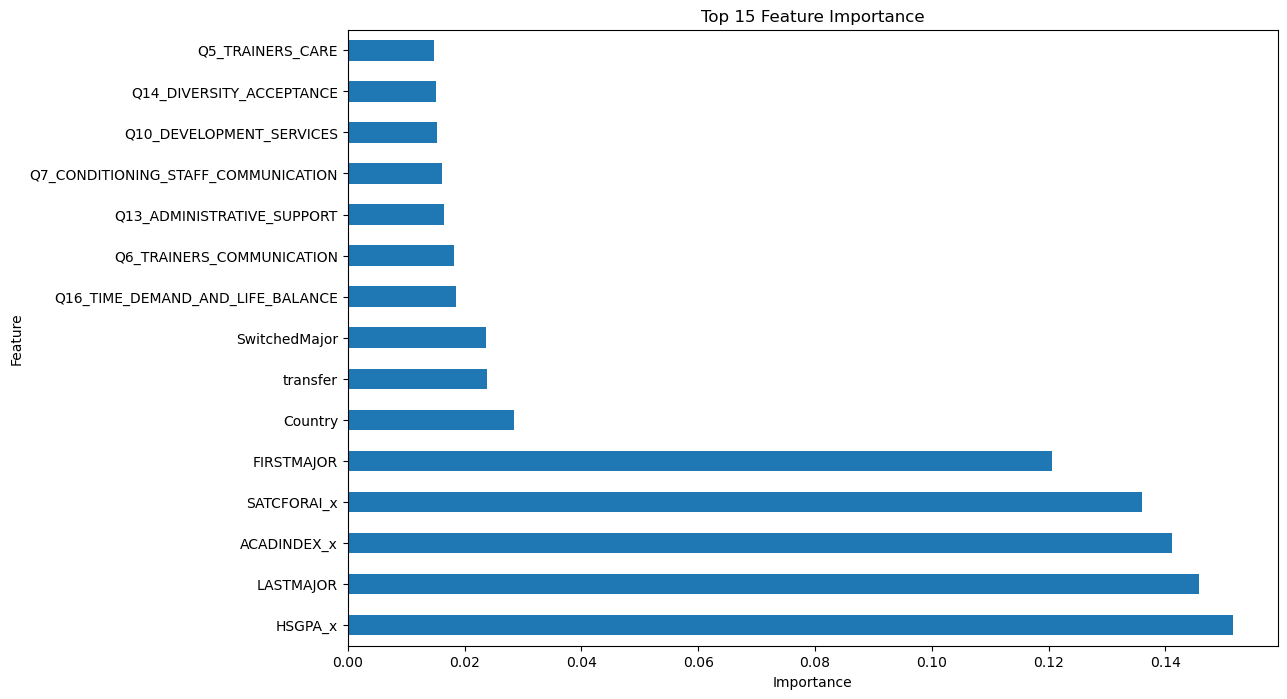

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

feature_importance = pd.Series(rf_classifier.feature_importances_, index=features.columns)
sorted_feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sorted_feature_importance[:15].plot(kind='barh')
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [37]:
selected_col = ['ACADINDEX_x','SATCFORAI_x','HSGPA_x','LASTMAJOR','FIRSTMAJOR','Country','SwitchedMajor','Q13_ADMINISTRATIVE_SUPPORT',
                         'Q9_ACADEMIC_SUPPORT_SERVICES','Q17_COACH_EMPHASIS_ON_ACADEMICS','Q11_APPAREL_EQUIPMENT','Q2_COACH_COMMUNICATION','Q10_DEVELOPMENT_SERVICES','Q16_TIME_DEMAND_AND_LIFE_BALANCE'
       ]

features = features[selected_col]


model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9593908629441624
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.96      0.99      0.98       190

    accuracy                           0.96       197
   macro avg       0.48      0.50      0.49       197
weighted avg       0.93      0.96      0.94       197



C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 